# Práctica 04.01: Regresión

### Importaciones

In [99]:
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
from keras.callbacks import History 
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Lectura de la información

#### Carga de los datos

Dataset: rossmann_curso.csv

In [100]:
df=pd.read_csv('rossmann_curso.csv')
print(df.shape)
print(df.head(5))

(1017209, 45)
   Customers  Open  Promo  Promo2  StateHoliday  SchoolHoliday  \
0        555     1      1       0             0              1   
1        546     1      1       0             0              1   
2        523     1      1       0             0              1   
3        560     1      1       0             0              1   
4        612     1      1       0             0              1   

   CompetitionDistance  DayOfWeek_1  DayOfWeek_2  DayOfWeek_3  ...  \
0               1270.0          0.0          0.0          0.0  ...   
1               1270.0          0.0          0.0          0.0  ...   
2               1270.0          0.0          0.0          1.0  ...   
3               1270.0          0.0          1.0          0.0  ...   
4               1270.0          1.0          0.0          0.0  ...   

   StoreType_c  StoreType_d  Assortment_a  Assortment_b  Assortment_c  \
0          1.0          0.0           1.0           0.0           0.0   
1          1.0        

In [101]:
# 1.- Cargar el dataset completo en un dataframe, usando read_csv

# 2.- Mostrar las dimensiones del dataset

# 3.- Mostrar las 5 primeras filas del dataset


### Preparación de los datos

In [102]:
sales=df['Sales']
df.drop(['Sales'], axis=1, inplace=True)
# 6.- Crear los conjuntos de entrenamiento y test con una relación 80/20
X_train, X_test, y_train, y_test = train_test_split(df, sales, test_size=0.2, random_state=42)
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)
print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
# 8.- Mostrar las dimensiones de los tres nuevos conjuntos: entrenamiento, validación y test
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)

# 9.- Calcular el promedio del objetivo del conjunto de entrenamiento
avg_conjunto_entrenamiento = y_train.mean()
print(avg_conjunto_entrenamiento)

# 10.- Calcular el error medio absoluto (MAE) sobre el conjunto de test
avg_conjunto_test = y_test.mean()
mae = mean_absolute_error(y_test, [avg_conjunto_test]*len(y_test))
print(mae)


(813767, 44)
(203442, 44)
(813767, 1)
(203442, 1)
(732390, 44)
(81377, 44)
(732390, 1)
(81377, 1)
(203442, 44)
(203442, 1)
(732390, 44)
(732390, 1)
(81377, 44)
(81377, 1)
5777.71205232185
2885.4067950497615


In [103]:
# 4.- Crear un nuevo dataframe con la columna objetivo (la última: 'Sales')

# 5.- Eliminar la columna objetivo del dataframe del dataset

# 6.- Crear los conjuntos de entrenamiento y test con una relación 80/20

# 7.- Dividir el conjunto de entrenamiento en entrenamiento y validación (relación 90/10)

# 8.- Mostrar las dimensiones de los tres nuevos conjuntos: entrenamiento, validación y test

# 9.- Calcular el promedio del objetivo del conjunto de entrenamiento

# 10.- Calcular el error medio absoluto (MAE) sobre el conjunto de test


### Costrucción del modelo: MLP profunda

In [104]:
modelo = Sequential() # crea modelo

modelo.add(Dense(350, activation='relu', input_shape=(X_train.shape[1],)))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))
modelo.add(Dense(350, activation='relu'))


modelo.add(Dense(1, activation='linear'))



/home/sergio/venv_dl/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [105]:
# 11.- Crear el modelo secuencial

# 12.- Añadir la capa de entrada: densa de 350 unidades y función de activación ReLU

# 13.- Añadir cuatro capas densas de 350 unidades con función de activación ReLU

# 14.- Añadir una capa densa de salida con activación lineal


### Compilación y entrenamiento

In [106]:
# 15. Compilar el modelo usado:
# - optimizador: adam
# - función de perdida: error médio cuadrático
# - métrica: promedio del error absoluto

modelo.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
historial = modelo.fit(X_train,y_train, validation_data=(X_val,y_val), epochs=15,batch_size=16)

Epoch 1/15
19135/45775 ━━━━━━━━━━━━━━━━━━━━ 3:50 9ms/step - loss: 2673164.5000 - mae: 1040.4341

KeyboardInterrupt: 

In [ ]:
# 15. Compilar el modelo usado:
# - optimizador: adam
# - función de perdida: error médio cuadrático
# - métrica: promedio del error absoluto


# 16.- Entrenar la red usando los datasets de entrenamiento y validación, durante 15 iteraciones (epochs)
#      y un lote de 16 ejemplos.
historial = modelo.fit(x_entr,y_entr, validation_data=(x_val,y_val), epochs=15,batch_size=16)

Epoch 1/15
45775/45775 [==============================] - 170s 4ms/step - loss: 2075287.7349 - mean_absolute_error: 927.5801 - val_loss: 1485987.1250 - val_mean_absolute_error: 784.1970
Epoch 2/15
45775/45775 [==============================] - 169s 4ms/step - loss: 1211385.0152 - mean_absolute_error: 735.3630 - val_loss: 1069735.0000 - val_mean_absolute_error: 687.5973
Epoch 3/15
45775/45775 [==============================] - 171s 4ms/step - loss: 1135274.2480 - mean_absolute_error: 710.9550 - val_loss: 1181392.3750 - val_mean_absolute_error: 713.9583
Epoch 4/15
45775/45775 [==============================] - 171s 4ms/step - loss: 1093493.1733 - mean_absolute_error: 700.1766 - val_loss: 1020034.3125 - val_mean_absolute_error: 665.8757
Epoch 5/15
45775/45775 [==============================] - 170s 4ms/step - loss: 1056875.0489 - mean_absolute_error: 686.7417 - val_loss: 1001308.0625 - val_mean_absolute_error: 667.3304
Epoch 6/15
45775/45775 [==============================] - 170s 4ms/ste

### Evaluar la red usando los datos de *test*

In [ ]:
# 17.- Evaluar el modelo usando el conjunto de test y mostrar


6358/6358 [==============================] - 14s 2ms/step - loss: 825782.3125 - mean_absolute_error: 609.6304
Métrica  loss : 825782.31
Métrica  mean_absolute_error : 609.63


### Gráficas de pérdidas en la historia de entrenamiento

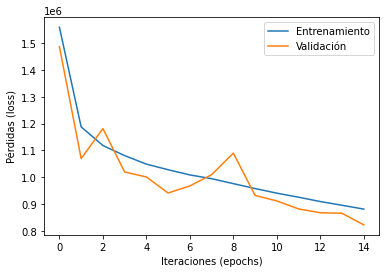

In [ ]:
# 18.- Visualización de la historia: pérdidas en entrenamiento y validación



### Predicción sobre los datos de evaluación (test)

In [ ]:
# 19.- Uso del método 'predict' sobre los datos de test

# 20.- Mostrar las ventas reales y las predichas de las 15 primeras filas del conjunto de test


,Ventas,Prediccion
647815,8525,7708.216797
531526,5888,5343.245605
325910,0,0.416154
251929,7569,7887.126465
518525,4828,5359.786621
532594,5339,6007.212891
508691,2502,3118.690186
939654,8377,7798.310059
302974,13402,14376.632812
738619,3305,4177.998047


In [ ]:
# 21.- Cálculo del error cuadrático medio sobre los valores de la predicción:
#      Usar la función de sklearn 'mean_squared_error'


# 22.- Cálculo del promedio del error absoluto sobre los valores de la predicción:
#      Usar la función de sklearn 'mean_absolute_error'


Error cuadrático medio (MSE): 825781.3036572566
Error medio absoluto (MAE): 609.6301651128529
